This dataset is a credit card fraud detection dataset obtained from Kaggle (https://www.kaggle.com/mlg-ulb/creditcardfraud), highly imbalanced data with only 0.172% accounting for fraud transactions. In order to classify a transaction as fraud varied machine learning techniques such as Logistic Regression, Logistic Regrssion with Regularization, Random Forests, Support Vector Machines, XGBoost, LightGBM, Neural Networks. SMOTE (Synthetic Minority OverSampling Technique) is used to upsample the minority class. This technique is commonly used for Imbalanced Classifications. Different Hyperparameter tuning techniques such as Exhaustive Grid Search, Random Search, Bayesian Optimization are used to find the optimal tuning parameters for XGBoost and LightGBM. 

## Importing the required packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data set for the computation

In [10]:
X = pd.read_csv("/Users/ruthvik/Downloads/creditcard 2.csv")

There are 284,807 observations in total and 31 different variables, 30 are predictor variables and the target variable is mentioned as Class. Variables V1,V2......V28 are PCA transformed variables. Only time and Amount are not transformed. All the variables are quantitative, only Class variable has been transformed to Categorical.  

In [11]:
X.shape

(284807, 31)

In [12]:
X.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [13]:
X['Class'] = X['Class'].astype('category')

In [14]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The distribution of the target variable

In [15]:
X['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [16]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


### The Distribution of Amount and Time 

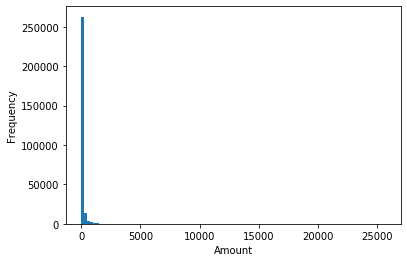

In [9]:
plt.hist(X['Amount'], bins = 100)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

The Amount variable is right skewed and needs to be log transformed to convert it into normal distribution

In [10]:
X1 = X[X['Class'] == 1]
X2 = X[X['Class'] == 0]

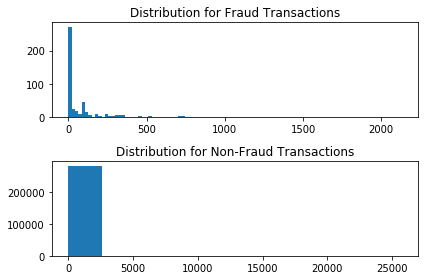

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.hist(X1['Amount'], bins = 100)
ax1.set_title('Distribution for Fraud Transactions')
ax2.hist(X2['Amount'], bins = 10)
ax2.set_title('Distribution for Non-Fraud Transactions')
plt.tight_layout()
plt.show()

All the Fraud Transactions amount is less than $2500

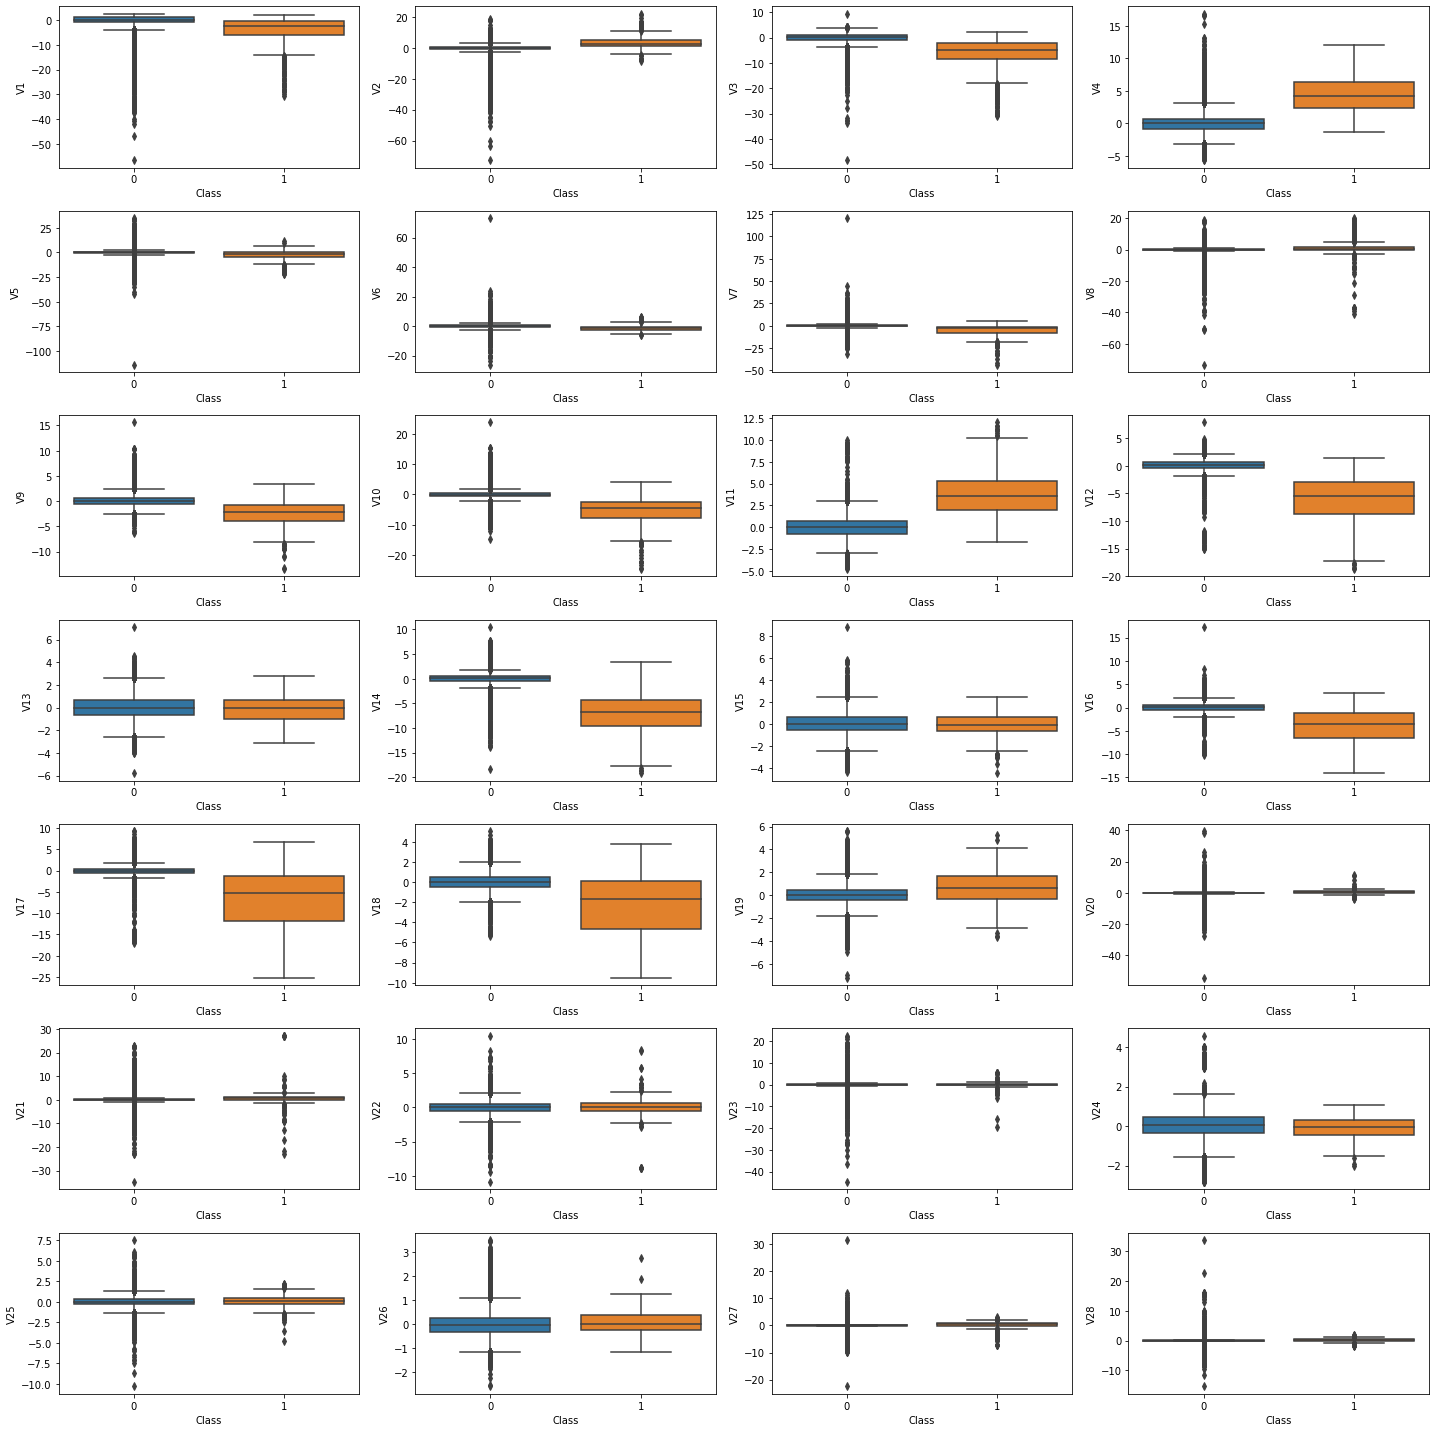

In [82]:
#plt.figure(28, figsize = [100,100])
f, axes = plt.subplots(7, 4, figsize = (20,20))
sns.boxplot(x = X['Class'], y = X['V1'] , ax=axes[0][0])
sns.boxplot(x = X['Class'], y = X['V2'] , ax=axes[0][1])
sns.boxplot(x = X['Class'], y = X['V3'] , ax=axes[0][2])
sns.boxplot(x = X['Class'], y = X['V4'] , ax=axes[0][3])
sns.boxplot(x = X['Class'], y = X['V5'] , ax=axes[1][0])
sns.boxplot(x = X['Class'], y = X['V6'] , ax=axes[1][1])
sns.boxplot(x = X['Class'], y = X['V7'] , ax=axes[1][2])
sns.boxplot(x = X['Class'], y = X['V8'] , ax=axes[1][3])
sns.boxplot(x = X['Class'], y = X['V9'] , ax=axes[2][0])
sns.boxplot(x = X['Class'], y = X['V10'] , ax=axes[2][1])
sns.boxplot(x = X['Class'], y = X['V11'] , ax=axes[2][2])
sns.boxplot(x = X['Class'], y = X['V12'] , ax=axes[2][3])
sns.boxplot(x = X['Class'], y = X['V13'] , ax=axes[3][0])
sns.boxplot(x = X['Class'], y = X['V14'] , ax=axes[3][1])
sns.boxplot(x = X['Class'], y = X['V15'] , ax=axes[3][2])
sns.boxplot(x = X['Class'], y = X['V16'] , ax=axes[3][3])
sns.boxplot(x = X['Class'], y = X['V17'] , ax=axes[4][0])
sns.boxplot(x = X['Class'], y = X['V18'] , ax=axes[4][1])
sns.boxplot(x = X['Class'], y = X['V19'] , ax=axes[4][2])
sns.boxplot(x = X['Class'], y = X['V20'] , ax=axes[4][3])
sns.boxplot(x = X['Class'], y = X['V21'] , ax=axes[5][0])
sns.boxplot(x = X['Class'], y = X['V22'] , ax=axes[5][1])
sns.boxplot(x = X['Class'], y = X['V23'] , ax=axes[5][2])
sns.boxplot(x = X['Class'], y = X['V24'] , ax=axes[5][3])
sns.boxplot(x = X['Class'], y = X['V25'] , ax=axes[6][0])
sns.boxplot(x = X['Class'], y = X['V26'] , ax=axes[6][1])
sns.boxplot(x = X['Class'], y = X['V27'] , ax=axes[6][2])
sns.boxplot(x = X['Class'], y = X['V28'] , ax=axes[6][3])
f.tight_layout()
plt.show()

The variation among the PCA transformed variables V3, V4, V9, V10, V11, V12,V14, V16, V17, V18 is quite significant. These variables might be significant enough to determine the fraud transaction

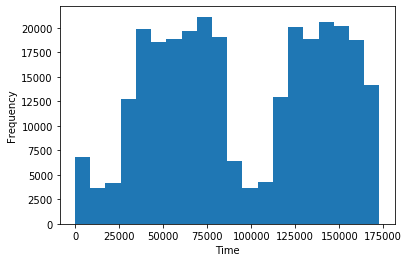

In [83]:
plt.hist(X['Time'], bins = 20)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

### Preprocessing the Variables

In [19]:
from sklearn import preprocessing

In [20]:
# Scaling the Amount variable
Amount = X['Amount'].to_numpy()
Amount = Amount.reshape(284807,1)
# Transforming the above
scaler = preprocessing.StandardScaler().fit(Amount)
Amount = scaler.transform(Amount)

In [21]:
# dropping the original variable and replacing it with the transformed variable
X = X.drop(labels = ['Amount'], axis = 1)
X['Amount'] = Amount

In [22]:
# dropping the time variable, not using for model building 
X = X.drop(labels = ['Time'], axis = 1)

In [23]:
Y = X['Class']
X = X.drop(labels = ['Class'], axis = 1)

### Splitting the Dataset into Train, Validation, Test

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size = 0.2, random_state = 20)

In [301]:
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state = 20)

### Using Neural Networks to solve the problem 

In [25]:
import keras
from keras import layers
from keras.layers import Dense, Activation,Dropout
from keras.utils import layer_utils
from keras.models import Sequential
import keras.backend as K
K.set_image_data_format('channels_last')
from sklearn.metrics import confusion_matrix, roc_auc_score,f1_score
import tensorflow as tf
from keras import metrics

Using TensorFlow backend.


In [303]:
inputs = X_train.shape[1]

Different Activation functions like "tanh" , "Relu" , "sigmoid" are used in the hidden layers and the model is evaluated based on the F1 score. In an imbalanced Fraud dataset, we have to make sure that number of fraud transactions classified as non-fraud should be reduced. We have to reduce number of false negatives. 

In [304]:
model = Sequential()

model.add(Dense(28, activation = 'relu', input_shape = (inputs,)))
model.add(Dropout(0.4))

model.add(Dense(14, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 28)                840       
_________________________________________________________________
dropout_9 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 14)                406       
_________________________________________________________________
dropout_10 (Dropout)         (None, 14)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 105       
_________________________________________________________________
dropout_11 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                

In [305]:
# Choosing the metrics using tensorflow
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [306]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [METRICS[7]])

In [307]:
model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_data=(X_val, Y_val))

Train on 227845 samples, validate on 28481 samples
Epoch 1/10
227845/227845 [==============================] - 9s 39us/step - loss: 0.0839 - auc: 0.6602 - val_loss: 0.0062 - val_auc: 0.8991
Epoch 2/10
227845/227845 [==============================] - 6s 28us/step - loss: 0.0201 - auc: 0.7851 - val_loss: 0.0068 - val_auc: 0.8991
Epoch 3/10
227845/227845 [==============================] - 7s 29us/step - loss: 0.0123 - auc: 0.8482 - val_loss: 0.0073 - val_auc: 0.9102
Epoch 4/10
227845/227845 [==============================] - 7s 32us/step - loss: 0.0110 - auc: 0.8650 - val_loss: 0.0077 - val_auc: 0.9193
Epoch 5/10
227845/227845 [==============================] - 7s 29us/step - loss: 0.0109 - auc: 0.8699 - val_loss: 0.0080 - val_auc: 0.9088
Epoch 6/10
227845/227845 [==============================] - 7s 29us/step - loss: 0.0110 - auc: 0.8636 - val_loss: 0.0076 - val_auc: 0.9211
Epoch 7/10
227845/227845 [==============================] - 7s 29us/step - loss: 0.0108 - auc: 0.8658 - val_loss: 0

In [454]:
predictions = model.predict(X_test)

In [451]:
predictions = np.where(predictions>0.5 , 1, 0)

Predictions for sigmoid activations in hidden layer

In [442]:
# sigmoid activations 
confusion_matrix(Y_test, predictions)

array([[28426,     7],
       [    9,    39]])

In [445]:
# sigmoid activations 
roc_auc_score(Y_test, predictions)

0.963770457449677

In [443]:
# sigmoid activations
f1_score(Y_test, predictions)

0.8297872340425533

Predictions for relu activations in hidden layer

In [428]:
# relu activations
confusion_matrix(Y_test, predictions)

array([[28433,     0],
       [   47,     1]])

In [430]:
# relu activations
roc_auc_score(Y_test, predictions)

0.9857918908779705

In [435]:
# relu activations
f1_score(Y_test, predictions)

0.04081632653061225

Predictions for tanh activations in hidden layer

In [452]:
# tanh activations
confusion_matrix(Y_test, predictions)

array([[28426,     7],
       [   10,    38]])

In [455]:
# tanh activations
roc_auc_score(Y_test, predictions)

0.9551643336967608

In [453]:
# tanh activations
f1_score(Y_test, predictions)

0.8172043010752689

The F1 score is maximum in case of sigmoid activations as well as the number of false negatives is minimum while using sigmoid activations

### Logistic Regression with L2 Regularization

In [374]:
# Splitting the dataset to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 10)

In [26]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

In [52]:
clf = LogisticRegressionCV(random_state=0, solver = 'lbfgs', max_iter = 100000, cv = 5).fit(X_train, Y_train)

In [54]:
clf.coef_

array([[ 0.02018542,  0.04562326,  0.01984665,  0.62619405,  0.12776079,
        -0.10257627, -0.01024932, -0.19895134, -0.16336404, -0.60391362,
         0.04400022, -0.01299055, -0.24945956, -0.54774827, -0.08227262,
        -0.29840529, -0.04429864,  0.02917316,  0.01985542, -0.25340689,
         0.26183722,  0.3842324 , -0.08658256,  0.06170507, -0.06257499,
         0.04960424, -0.39466333, -0.11819105,  0.12997505]])

In [55]:
# predicting the class on the test data 
yhat = clf.predict(X_test)

In [56]:
# predicting the probabilities
predictions = clf.predict_proba(X_test)

In [58]:
# confusion matrix
confusion_matrix(Y_test, yhat)

array([[28427,     6],
       [   16,    32]])

In [59]:
# f1 score
f1_score(Y_test, yhat)

0.744186046511628

In [60]:
# AUC score 
roc_auc_score(Y_test,predictions[:,1])

0.9632124936986365

### Logistic Regression with L2 Regularization - Tuning the regularization parameter C

In [25]:
C = [30,20,10,1,0.1,0.01, 0.001]

for c in C:
    clf_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs').fit(X_train, Y_train)
    print('C:', c)
    print("Coefficients: ", clf_l2.coef_)
    print("Training accuracy:" , clf_l2.score(X_train, Y_train))
    print("Testing accuracy:", clf_l2.score(X_test, Y_test))
    yhat = clf_l2.predict(X_test)
    print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
    print("f1 score:", f1_score(Y_test, yhat))
    predictions = clf_l2.predict_proba(X_test)
    print("roc_auc_score:" , roc_auc_score(Y_test,predictions[:,1]))
    print("\n")

C: 30
Coefficients:  [[ 0.06691407  0.07799199  0.05222089  0.78258058  0.16797428 -0.13759239
  -0.0564079  -0.17460974 -0.18411375 -0.89436042 -0.00756371  0.13697907
  -0.31603623 -0.49344064 -0.06448419 -0.34682088 -0.06303418  0.08511797
   0.00704787 -0.48330948  0.32969251  0.50277492 -0.07848427  0.11031793
  -0.0843082   0.14531353 -0.80406933 -0.27481341  0.26233494]]
Training accuracy: 0.999211941043827
Testing accuracy: 0.9991924440855307
Confusion Matrix: [[28427     6]
 [   17    31]]
f1 score: 0.7294117647058824
roc_auc_score: 0.9501584133459946


C: 20
Coefficients:  [[ 0.06689497  0.07787686  0.05223348  0.78235111  0.16787225 -0.137527
  -0.05648344 -0.17461381 -0.18417964 -0.89415276 -0.00764746  0.13674343
  -0.31591527 -0.49356606 -0.06455515 -0.34659722 -0.06296995  0.08505021
   0.00711638 -0.48314557  0.32971511  0.50278445 -0.07849028  0.11023669
  -0.08421891  0.14499971 -0.80374064 -0.2747129   0.26222945]]
Training accuracy: 0.999211941043827
Testing accurac

For C = 0.01, the F1 score is maximum. Also the false negatives are less 

### Random Forests 

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
clf_rf = RandomForestClassifier(n_estimators = 1000
                                , max_depth = 8
                                , random_state = 1
                                ).fit(X_train, Y_train)

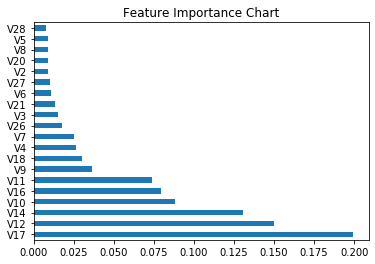

In [31]:
feat_importances = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature Importance Chart")
plt.show()

In [32]:
# predicting the class on the test data 
yhat = clf_rf.predict(X_test)

In [33]:
# predicting the probabilities
predictions = clf_rf.predict_proba(X_test)

In [34]:
# confusion matrix
confusion_matrix(Y_test, yhat)

array([[28433,     0],
       [   10,    38]])

In [35]:
# f1 score
f1_score(Y_test, yhat)

0.8837209302325582

In [36]:
# AUC score 
roc_auc_score(Y_test,predictions[:,1])

0.9567935292324646

### Bagging Classifier

In [340]:
from sklearn.ensemble import BaggingClassifier

In [39]:
clg_bg = BaggingClassifier(n_estimators = 100, max_samples = 0.8
                           , random_state = 20).fit(X_train, Y_train)

In [41]:
# predicting the class on the test data 
yhat = clg_bg.predict(X_test)

In [42]:
# confusion matrix
confusion_matrix(Y_test, yhat)

array([[28432,     1],
       [    9,    39]])

In [43]:
# f1 score
f1_score(Y_test, yhat)

0.8863636363636362

In [44]:
# AUC score 
roc_auc_score(Y_test,predictions[:,1])

0.9567935292324646

### XGBOOST 

In [28]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [65]:
clf_xgb = XGBClassifier(max_depth = 7 , learning_rate = 0.1
                        , n_estimators = 500, subsample = 0.6, colsample_bytree = 0.6,
                       colsample_bylevel = 0.8).fit(X_train, Y_train)

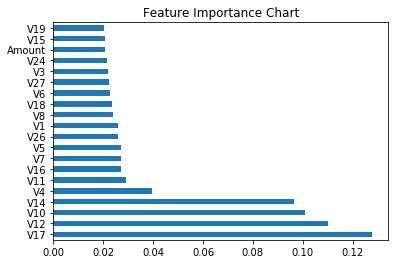

In [66]:
feat_importances = pd.Series(clf_xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature Importance Chart")
plt.show()

In [67]:
# predicting the class on the test data 
yhat = clf_xgb.predict(X_test)

In [68]:
# predicting the probabilities
predictions = clf_xgb.predict_proba(X_test)

In [69]:
# confusion matrix
confusion_matrix(Y_test, yhat)

array([[28436,     2],
       [    9,    34]])

In [70]:
# f1 score
f1_score(Y_test, yhat)

0.8607594936708861

In [71]:
# AUC score 
roc_auc_score(Y_test,predictions[:,1])

0.9723977252840532

### Hyperparameter tuning using Bayesian Optimization 

In [2]:
#pip install bayesian-optimization

In [1]:
from bayes_opt import BayesianOptimization

In [ ]:
score = make_scorer(f1_score(Y_train, yhat), greater_is_better=False)

In [62]:
def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample_bytree,
                        colsample_bylevel,
                        colsample,
                        gamma):
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    clf = LGBMClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        subsample = subsample,
        colsample_bytree = colsample_bytree,
        colsample_bylevel = colsample_bylevel,
        colsample = colsample,
        gamma=gamma)
    return np.mean(cross_val_score(clf, X_train, Y_train, cv=3, scoring= 'f1_score'))

In [63]:
pbounds = {
    'learning_rate': (0.01, 0.5),
    'n_estimators': (100, 1000),
    'max_depth': (3,10),
    'subsample': (0, 1.0),  # Change for big datasets
    'colsample': (0, 1.0),  # Change for datasets with lots of features
    'colsample_bytree' : (0.1, 1.0),
    'colsample_bylevel' : (0.1,1.0),
    'gamma': (0, 5)}

In [64]:
optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)

In [65]:
optimizer.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   | colsample | colsam... | colsam... |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------------------


ValueError: 'f1_score' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [50]:
params = optimizer.max['params']
print(params)

{'colsample': 0.9888610889064947, 'colsample_bylevel': 0.7481656543798394, 'colsample_bytree': 0.2804439920644052, 'gamma': 3.946396642257443, 'learning_rate': 0.060580743223044596, 'max_depth': 6.135254683231336, 'n_estimators': 917.735952783786, 'subsample': 0.2936141483736795}


In [51]:
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

In [53]:
classifier2 = LGBMClassifier(**params).fit(X_train, Y_train)

In [55]:
yhat = classifier2.predict(X_test)
predictions = classifier2.predict_proba(X_test)
confusion_matrix(Y_test, yhat)

array([[56819,    45],
       [   30,    68]])

In [56]:
# f1 score
f1_score(Y_test, yhat)

0.6445497630331755

In [57]:
# AUC score 
roc_auc_score(Y_test,predictions[:,1])

0.9346166435060237

### LightGBM 

In [44]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [128]:
clf_lgbm = LGBMClassifier(max_depth = 7 , learning_rate = 0.01
                        , n_estimators = 500, subsample = 0.6, colsample_bytree = 0.6,
                       colsample_bylevel = 0.8).fit(X_train, Y_train)

In [129]:
# predicting the class on the test data 
yhat = clf_lgbm.predict(X_test)

In [130]:
# predicting the probabilities
predictions = clf_lgbm.predict_proba(X_test)

In [131]:
# confusion matrix
confusion_matrix(Y_test, yhat)

array([[28437,     1],
       [    9,    34]])

In [132]:
# f1 score
f1_score(Y_test, yhat)

0.8717948717948717

In [133]:
# AUC score 
roc_auc_score(Y_test,predictions[:,1])

0.9693408917318295

### Naive Bayes Classifier 

In [315]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [135]:
clf_NB = GaussianNB().fit(X_train, Y_train)

In [136]:
# predicting the class on the test data 
yhat = clf_NB.predict(X_test)

In [140]:
# predicting the probabilities
predictions = clf_NB.predict_proba(X_test)

In [137]:
# confusion matrix
confusion_matrix(Y_test, yhat)

array([[27801,   637],
       [    7,    36]])

In [141]:
# AUC score 
roc_auc_score(Y_test,predictions[:,1])

0.9644129947319096

In [138]:
# f1 score
f1_score(Y_test, yhat)

0.10055865921787709

### Support Vector Machines 

In [204]:
from sklearn.linear_model import SGDClassifier

In [205]:
clf_svm = SGDClassifier(random_state = 0).fit(X_train, Y_train)

In [206]:
# predicting the class on the test data 
yhat = clf_svm.predict(X_test)

In [207]:
# confusion matrix
confusion_matrix(Y_test, yhat)

array([[28428,     5],
       [   24,    24]])

In [211]:
# f1 score
f1_score(Y_test, yhat)

0.6233766233766235

### Undersampling

In [308]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [318]:
import imblearn

Here we incorporate the method of near miss undersampling. There are three types of Nearmiss undersampling
  -  Nearmiss -1: Majority class examples with minimum average distance to three closest minority class
  -  Nearmiss -2: Majority class examples with minimum average distance to three farthest minority class
  -  Nearmiss -3: Majority class examples with minimum distance to each minority class example


In [310]:
from imblearn.under_sampling import NearMiss

In [311]:
undersample = NearMiss(version=3, n_neighbors_ver3=4, random_state = 1, sampling_strategy = 'not minority')

In [312]:
# Distribution of predicted class before undersampling
Y_train.value_counts()

0    255880
1       446
Name: Class, dtype: int64

In [313]:
X_train_Usample, Y_train_Usample = undersample.fit_resample(X_train, Y_train)

In [314]:
# Distribution of target varaible after undersampling
from collections import Counter
Counter(Y_train_Usample)

Counter({0: 446, 1: 446})

Logistic Regression

In [254]:
clf_lg_us = LogisticRegressionCV(random_state=0, solver = 'lbfgs'
                              , max_iter = 100000, cv = 5).fit(X_train_Usample, Y_train_Usample)

In [255]:
# predicting the class on the test data 
yhat = clf_lg_us.predict(X_test)

In [256]:
# predicting the probabilities
predictions = clf_lg_us.predict_proba(X_test)

In [257]:
# confusion matrix
confusion_matrix(Y_test, yhat)

array([[28428,     7],
       [   10,    36]])

In [258]:
# AUC score 
roc_auc_score(Y_test,predictions[:,1])

0.9722234539491288

In [259]:
# f1 score
f1_score(Y_test, yhat)

0.8089887640449438

### Logistic Regression with L2 Regularization

In [277]:
C = [30,20,10,1,0.1,0.01, 0.05, 0.001,0.005,0.0001]

for c in C:
    clf_l2_us = LogisticRegression(penalty = 'l2', C = c
                                   , solver = 'lbfgs', max_iter = 100000).fit(X_train_Usample, Y_train_Usample)
    print('C:', c)
    print("Coefficients: ", clf_l2_us.coef_)
    print("Training accuracy:" , clf_l2_us.score(X_train_Usample, Y_train_Usample))
    print("Testing accuracy:", clf_l2_us.score(X_test, Y_test))
    yhat = clf_l2_us.predict(X_test)
    print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
    print("f1 score:", f1_score(Y_test, yhat))
    predictions = clf_l2_us.predict_proba(X_test)
    print("roc_auc_score:" , roc_auc_score(Y_test,predictions[:,1]))
    print("\n")

C: 30
Coefficients:  [[ 0.04037804 -0.06406973  0.00442855  0.15894011  0.08264299  0.40403169
  -0.21810821  0.08286512  0.14971494 -0.24903897 -0.12776746  0.16584035
  -0.08779652 -0.459899   -0.06170906 -0.20996914  0.12845014 -0.27206267
  -0.06984527 -0.31025868  0.13080044  0.49095304 -0.05504886  0.34812794
   0.05710442  0.19395071 -0.6319153  -0.69437245  0.28132322]]
Training accuracy: 0.8262331838565022
Testing accuracy: 0.9282328569923809
Confusion Matrix: [[26403  2032]
 [   12    34]]
f1 score: 0.032196969696969696
roc_auc_score: 0.9325632067033126


C: 20
Coefficients:  [[ 0.04016734 -0.06419108  0.00453054  0.15882838  0.08237311  0.40379146
  -0.21785087  0.08275181  0.1497048  -0.24874322 -0.12770748  0.1655944
  -0.08775486 -0.45997808 -0.06174592 -0.20991155  0.12858265 -0.27225188
  -0.06991889 -0.30986889  0.13078949  0.49097311 -0.05509172  0.34771293
   0.05679318  0.1941168  -0.63133338 -0.69339369  0.28095828]]
Training accuracy: 0.8262331838565022
Testing ac

Logistic Regression with L1 Regularization

In [275]:
C = [30,20,10,1,0.1,0.01, 0.05, 0.001,0.005]

for c in C:
    clf_l1_us = LogisticRegression(penalty = 'l1', C = c
                                   , solver = 'saga', max_iter = 100000).fit(X_train_Usample, Y_train_Usample)
    print('C:', c)
    print("Coefficients: ", clf_l1_us.coef_)
    print("Training accuracy:" , clf_l1_us.score(X_train_Usample, Y_train_Usample))
    print("Testing accuracy:", clf_l1_us.score(X_test, Y_test))
    yhat = clf_l1_us.predict(X_test)
    print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
    print("f1 score:", f1_score(Y_test, yhat))
    predictions = clf_l1_us.predict_proba(X_test)
    print("roc_auc_score:" , roc_auc_score(Y_test,predictions[:,1]))
    print("\n")

C: 30
Coefficients:  [[ 3.40401729e-02 -8.00073626e-02 -6.41913222e-04  1.62225102e-01
   6.76351309e-02  4.06012582e-01 -1.99422585e-01  7.66818640e-02
   1.47985683e-01 -2.50187617e-01 -1.25339692e-01  1.65203373e-01
  -8.62673841e-02 -4.57734980e-01 -6.30005673e-02 -2.13178025e-01
   1.27861697e-01 -2.67092692e-01 -7.30551712e-02 -2.92879661e-01
   1.33733128e-01  4.84588951e-01 -6.84474974e-02  3.43884889e-01
   4.37921339e-02  1.94322184e-01 -6.26043645e-01 -6.51461293e-01
   2.35463530e-01]]
Training accuracy: 0.8239910313901345
Testing accuracy: 0.9293564130472947
Confusion Matrix: [[26435  2000]
 [   12    34]]
f1 score: 0.03269230769230769
roc_auc_score: 0.933170235701562


C: 20
Coefficients:  [[ 0.03366274 -0.08064492 -0.00071191  0.16209301  0.06661825  0.40530939
  -0.19834273  0.07619075  0.14748193 -0.24952006 -0.12501347  0.16489045
  -0.08593823 -0.45752521 -0.0631459  -0.21312941  0.1276216  -0.26649053
  -0.07295478 -0.29176021  0.13363776  0.48372898 -0.06889902  0.

Logistic Regression with Elasticnet

In [276]:
C = [30,20,10,1,0.1,0.01, 0.05, 0.001,0.005]

for c in C:
    clf_enet_us = LogisticRegression(penalty = 'elasticnet', C = c
                                   , solver = 'saga', max_iter = 100000, l1_ratio = 0.5).fit(X_train_Usample, Y_train_Usample)
    print('C:', c)
    print("Coefficients: ", clf_enet_us.coef_)
    print("Training accuracy:" , clf_enet_us.score(X_train_Usample, Y_train_Usample))
    print("Testing accuracy:", clf_enet_us.score(X_test, Y_test))
    yhat = clf_enet_us.predict(X_test)
    print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
    print("f1 score:", f1_score(Y_test, yhat))
    predictions = clf_enet_us.predict_proba(X_test)
    print("roc_auc_score:" , roc_auc_score(Y_test,predictions[:,1]))
    print("\n")

C: 30
Coefficients:  [[ 3.42951719e-02 -7.96042072e-02 -6.33042200e-04  1.62363520e-01
   6.83359195e-02  4.06511484e-01 -2.00103280e-01  7.70095941e-02
   1.48402428e-01 -2.50688060e-01 -1.25576803e-01  1.65458112e-01
  -8.65309533e-02 -4.57845879e-01 -6.29272650e-02 -2.13260483e-01
   1.28017338e-01 -2.67504088e-01 -7.31412136e-02 -2.93642296e-01
   1.33778770e-01  4.85128307e-01 -6.81677519e-02  3.44805901e-01
   4.45528709e-02  1.94968083e-01 -6.26674985e-01 -6.52828878e-01
   2.36853139e-01]]
Training accuracy: 0.8239910313901345
Testing accuracy: 0.9291457462869983
Confusion Matrix: [[26429  2006]
 [   12    34]]
f1 score: 0.032598274209012464
roc_auc_score: 0.9330899610859245


C: 20
Coefficients:  [[ 0.03403427 -0.08006373 -0.00070828  0.16230636  0.06764675  0.40606639
  -0.19933187  0.07667288  0.14811184 -0.25026932 -0.125365    0.16527468
  -0.08633387 -0.45768795 -0.06303167 -0.21327536  0.12784907 -0.26708108
  -0.07310333 -0.29286892  0.13371203  0.48452843 -0.06850288  

Support Vector Machine with different Kernels

In [279]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [297]:
C = [30,20,10,1,0.1,0.01, 0.05, 0.001,0.005]

for c in C:
    print('C:', c)
    clf_svm_us = SVC(C = c , kernel = 'poly' , gamma = 'auto'
                     , random_state = 20).fit(X_train_Usample, Y_train_Usample)
    print("Training accuracy:" , clf_svm_us.score(X_train_Usample, Y_train_Usample))
    print("Testing accuracy:", clf_svm_us.score(X_test, Y_test))
    yhat = clf_svm_us.predict(X_test)
    print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
    print("f1 score:", f1_score(Y_test, yhat))
    print("\n")

C: 30
Training accuracy: 0.9798206278026906
Testing accuracy: 0.9444893086619149
Confusion Matrix: [[26862  1573]
 [    8    38]]
f1 score: 0.045866022933011466


C: 20
Training accuracy: 0.976457399103139
Testing accuracy: 0.9557248692110529
Confusion Matrix: [[27183  1252]
 [    9    37]]
f1 score: 0.05543071161048689


C: 10
Training accuracy: 0.9674887892376681
Testing accuracy: 0.9726484322881921
Confusion Matrix: [[27667   768]
 [   11    35]]
f1 score: 0.08244994110718493


C: 1
Training accuracy: 0.9372197309417041
Testing accuracy: 0.9961728871879498
Confusion Matrix: [[28337    98]
 [   11    35]]
f1 score: 0.39106145251396646


C: 0.1
Training accuracy: 0.9147982062780269
Testing accuracy: 0.9969453319757031
Confusion Matrix: [[28361    74]
 [   13    33]]
f1 score: 0.4313725490196078


C: 0.01
Training accuracy: 0.850896860986547
Testing accuracy: 0.9983497770443454
Confusion Matrix: [[28404    31]
 [   16    30]]
f1 score: 0.5607476635514019


C: 0.05
Training accuracy: 0.

In [298]:
C = [30,20,10,1,0.1,0.01, 0.05, 0.001,0.005]

for c in C:
    print('C:', c)
    clf_svm_us = SVC(C = c , kernel = 'rbf' , gamma = 'auto'
                     , random_state = 20).fit(X_train_Usample, Y_train_Usample)
    print("Training accuracy:" , clf_svm_us.score(X_train_Usample, Y_train_Usample))
    print("Testing accuracy:", clf_svm_us.score(X_test, Y_test))
    yhat = clf_svm_us.predict(X_test)
    print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
    print("f1 score:", f1_score(Y_test, yhat))
    print("\n")

C: 30
Training accuracy: 0.9798206278026906
Testing accuracy: 0.8850812822583477
Confusion Matrix: [[25165  3270]
 [    3    43]]
f1 score: 0.02560285799345043


C: 20
Training accuracy: 0.9742152466367713
Testing accuracy: 0.9081844036375127
Confusion Matrix: [[25823  2612]
 [    3    43]]
f1 score: 0.03184005923731951


C: 10
Training accuracy: 0.9573991031390134
Testing accuracy: 0.9284084126259612
Confusion Matrix: [[26401  2034]
 [    5    41]]
f1 score: 0.03866100895803866


C: 1
Training accuracy: 0.9181614349775785
Testing accuracy: 0.9758786559460693
Confusion Matrix: [[27756   679]
 [    8    38]]
f1 score: 0.09960681520314547


C: 0.1
Training accuracy: 0.773542600896861
Testing accuracy: 0.9129244057441803
Confusion Matrix: [[25962  2473]
 [    7    39]]
f1 score: 0.030492572322126658


C: 0.01
Training accuracy: 0.7073991031390134
Testing accuracy: 0.826691478529546
Confusion Matrix: [[23504  4931]
 [    5    41]]
f1 score: 0.01634117178158629


C: 0.05
Training accuracy: 

Naive Bayes Classifier

In [316]:
clf_NB_us = GaussianNB().fit(X_train_Usample, Y_train_Usample)

In [317]:
print("Training accuracy:" , clf_NB_us.score(X_train_Usample, Y_train_Usample))
print("Testing accuracy:", clf_NB_us.score(X_test, Y_test))
yhat = clf_NB_us.predict(X_test)
predictions = clf_NB_us.predict_proba(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
print("AUC Score:", roc_auc_score(Y_test,predictions[:,1]))
print("f1 score:", f1_score(Y_test, yhat))
print("\n")

Training accuracy: 0.742152466367713
Testing accuracy: 0.9927319967697763
Confusion Matrix: [[28246   189]
 [   18    28]]
AUC Score: 0.9264745682372459
f1 score: 0.21292775665399238




### SMOTE Over Sampling 

In [375]:
from imblearn.over_sampling import SMOTE

In [376]:
from collections import Counter

In [377]:
# Before Oversampling
Counter(Y_train)

Counter({0: 255882, 1: 444})

In [378]:
X_train_os, Y_train_os = SMOTE(random_state = 45
                   , sampling_strategy = 'minority'
                   , k_neighbors = 5).fit_resample(X_train, Y_train)

In [379]:
# After over sampling
Counter(Y_train_os)

Counter({0: 255882, 1: 255882})

In [329]:
# Logistic Regression
clf_os = LogisticRegressionCV(random_state=0, solver = 'lbfgs'
                           , max_iter = 100000, cv = 5).fit(X_train_os, Y_train_os)

In [330]:
print("Training accuracy:" , clf_os.score(X_train_Usample, Y_train_Usample))
print("Testing accuracy:", clf_os.score(X_test, Y_test))
yhat = clf_os.predict(X_test)
predictions = clf_os.predict_proba(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
print("AUC Score:", roc_auc_score(Y_test,predictions[:,1]))
print("f1 score:", f1_score(Y_test, yhat))
print("\n")

Training accuracy: 0.6849775784753364
Testing accuracy: 0.9761244338330817
Confusion Matrix: [[27759   676]
 [    4    42]]
AUC Score: 0.982062828265839
f1 score: 0.10994764397905758




In [335]:
# Logistic Regression with HyperParameter tuning
C = [0.005, 0.001, 0.0005,0.0001, 0.00005,0.00001]

for c in C:
    clf_l2_os = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs').fit(X_train_os, Y_train_os)
    print('C:', c)
    print("Testing accuracy:", clf_l2_os.score(X_test, Y_test))
    yhat = clf_l2_os.predict(X_test)
    print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
    print("f1 score:", f1_score(Y_test, yhat))
    predictions = clf_l2_os.predict_proba(X_test)
    print("roc_auc_score:" , roc_auc_score(Y_test,predictions[:,1]))
    print("\n")

C: 0.005
Testing accuracy: 0.9769671008742671
Confusion Matrix: [[27783   652]
 [    4    42]]
f1 score: 0.11351351351351352
roc_auc_score: 0.98186940466816


C: 0.001
Testing accuracy: 0.9778799901688845
Confusion Matrix: [[27809   626]
 [    4    42]]
f1 score: 0.1176470588235294
roc_auc_score: 0.9814217781209623


C: 0.0005
Testing accuracy: 0.9786875460833538
Confusion Matrix: [[27832   603]
 [    4    42]]
f1 score: 0.1215629522431259
roc_auc_score: 0.9811041199990825


C: 0.0001
Testing accuracy: 0.9822688810083916
Confusion Matrix: [[27934   501]
 [    4    42]]
f1 score: 0.1426146010186757
roc_auc_score: 0.979945871973456


C: 5e-05
Testing accuracy: 0.9843053263579228
Confusion Matrix: [[27995   440]
 [    7    39]]
f1 score: 0.14857142857142855
roc_auc_score: 0.9791354806155916


C: 1e-05
Testing accuracy: 0.9907657736736772
Confusion Matrix: [[28179   256]
 [    7    39]]
f1 score: 0.2287390029325513
roc_auc_score: 0.9767815230770407




In [343]:
# Random Forests
clf_rf_os = RandomForestClassifier(n_estimators = 1000
                                , max_depth = 8
                                , random_state = 1
                                ).fit(X_train_os, Y_train_os)

In [344]:
print("Testing accuracy:", clf_rf_os.score(X_test, Y_test))
yhat = clf_rf_os.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
print("f1 score:", f1_score(Y_test, yhat))
predictions = clf_rf_os.predict_proba(X_test)
print("roc_auc_score:" , roc_auc_score(Y_test,predictions[:,1]))
print("\n")

Testing accuracy: 0.9975773322565921
Confusion Matrix: [[28373    62]
 [    7    39]]
f1 score: 0.5306122448979592
roc_auc_score: 0.9900413605400571




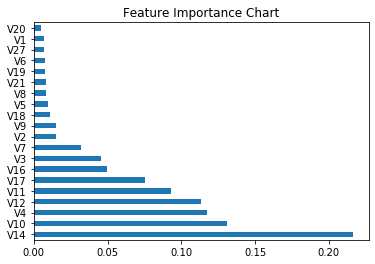

In [345]:
feat_importances = pd.Series(clf_rf_os.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature Importance Chart")
plt.show()

In [341]:
# Bagging Classifier
clg_bg_os = BaggingClassifier(n_estimators = 100, max_samples = 0.8
                           , random_state = 20).fit(X_train_os, Y_train_os)

In [342]:
print("Testing accuracy:", clg_bg_os.score(X_test, Y_test))
yhat = clg_bg_os.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
print("f1 score:", f1_score(Y_test, yhat))
predictions = clg_bg_os.predict_proba(X_test)
print("roc_auc_score:" , roc_auc_score(Y_test,predictions[:,1]))
print("\n")

Testing accuracy: 0.9989817773252344
Confusion Matrix: [[28416    19]
 [   10    36]]
f1 score: 0.7128712871287128
roc_auc_score: 0.9525676409201764




In [388]:
#XGBoost
clf_xgb_os = XGBClassifier(max_depth = 7 , learning_rate = 0.1
                        , n_estimators = 500, subsample = 0.6, colsample_bytree = 0.6,
                       colsample_bylevel = 0.8).fit(X_train_os, Y_train_os)

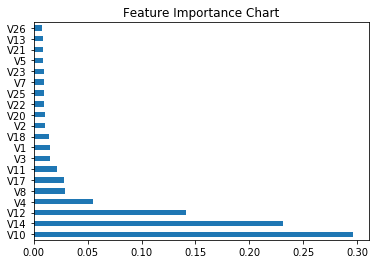

In [389]:
feat_importances = pd.Series(clf_xgb_os.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature Importance Chart")
plt.show()

In [392]:
#print("Testing accuracy:", clf_xgb_os.score(X_test, Y_test))
yhat = clf_xgb_os.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
print("f1 score:", f1_score(Y_test, yhat))
predictions = clf_xgb_os.predict_proba(X_test)
print("roc_auc_score:" , roc_auc_score(Y_test,predictions[:,1]))
print("\n")

Confusion Matrix: [[28427     6]
 [    7    41]]
f1 score: 0.8631578947368421
roc_auc_score: 0.9804108195875684




In [393]:
# Light GBM
clf_lgbm_os = LGBMClassifier(max_depth = 7 , learning_rate = 0.01
                        , n_estimators = 500, subsample = 0.6, colsample_bytree = 0.6,
                       colsample_bylevel = 0.8).fit(X_train_os, Y_train_os)

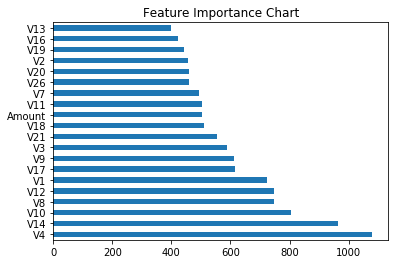

In [394]:
feat_importances = pd.Series(clf_lgbm_os.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature Importance Chart")
plt.show()

In [395]:
print("Testing accuracy:", clf_lgbm_os.score(X_test, Y_test))
yhat = clf_lgbm_os.predict(X_test)
print("Confusion Matrix:", confusion_matrix(Y_test, yhat))
print("f1 score:", f1_score(Y_test, yhat))
predictions = clf_lgbm_os.predict_proba(X_test)
print("roc_auc_score:" , roc_auc_score(Y_test,predictions[:,1]))
print("\n")

Testing accuracy: 0.9959973315543695
Confusion Matrix: [[28323   110]
 [    4    44]]
f1 score: 0.4356435643564356
roc_auc_score: 0.9731756087410168


